# Multi-Class Text Classification with Scikit-Learn
https://towardsdatascience.com/multi-class-text-classification-with-scikit-learn-12f1e60e0a9f

In [1]:
%matplotlib inline

In [4]:
import pandas as pd
df = pd.read_csv('../data/Consumer_Complaints_100k.csv', nrows=100000)
df.head()

Date received                                            Product  \
0    08/23/2019                                    Debt collection   
1    08/23/2019                                    Debt collection   
2    08/23/2019                                    Debt collection   
3    08/23/2019  Credit reporting, credit repair services, or o...   
4    08/23/2019                        Checking or savings account   

        Sub-product                                              Issue  \
0     I do not know                  Attempts to collect debt not owed   
1        Other debt                  Attempts to collect debt not owed   
2        Other debt  Took or threatened to take negative or legal a...   
3  Credit reporting                        Improper use of your report   
4  Checking account                                 Closing an account   

                                           Sub-issue  \
0                                  Debt is not yours   
1                                      Debt was paid   
2  Sued you without properly notifying you of law...   
3  Credit inquiries on your report that you don't...   
4             Funds not received from closed account   

  Consumer complaint narrative Company public response  \
0                          NaN                     NaN   
1                          NaN                     NaN   
2                          NaN                     NaN   
3                          NaN                     NaN   
4                          NaN                     NaN   

                                       Company State ZIP code           Tags  \
0  Capital Credit and Collection Service, Inc.    OR    97202            NaN   
1                Diversified Consultants, Inc.    NY    10040            NaN   
2             ONEMAIN FINANCIAL HOLDINGS, LLC.    IL    60428            NaN   
3            CONSUMER PORTFOLIO SERVICES, INC.    NJ    08009            NaN   
4                    NAVY FEDERAL CREDIT UNION    TX    77096  Servicemember   

  Consumer consent provided? Submitted via Date sent to company  \
0                        NaN           Web           08/23/2019   
1                        NaN           Web           08/23/2019   
2                        NaN           Web           08/23/2019   
3                        NaN           Web           08/23/2019   
4                        NaN      Referral           08/23/2019   

  Company response to consumer Timely response?  Consumer disputed?  \
0      Closed with explanation              Yes                 NaN   
1                  In progress              Yes                 NaN   
2                  In progress              Yes                 NaN   
3      Closed with explanation              Yes                 NaN   
4                  In progress              Yes                 NaN   

   Complaint ID  
0       3352204  
1       3351351  
2       3351070  
3       3351697  
4       3351787

In [5]:
df = df[pd.notnull(df['Consumer complaint narrative'])]

In [6]:
df.head()

Date received                                            Product  \
1025    08/16/2019                                    Debt collection   
1038    08/16/2019                                    Debt collection   
1067    08/16/2019  Credit reporting, credit repair services, or o...   
1085    08/16/2019                                    Debt collection   
1138    08/16/2019  Credit reporting, credit repair services, or o...   

           Sub-product                                 Issue  \
1025        Other debt     Attempts to collect debt not owed   
1038        Other debt    False statements or representation   
1067  Credit reporting  Incorrect information on your report   
1085        Other debt     Attempts to collect debt not owed   
1138  Credit reporting           Improper use of your report   

                                              Sub-issue  \
1025                  Debt was result of identity theft   
1038                  Attempted to collect wrong amount   
1067                           Account status incorrect   
1085                                  Debt is not yours   
1138  Credit inquiries on your report that you don't...   

                           Consumer complaint narrative  \
1025  Ability recovery services is listed on my cred...   
1038  On my credit report, the collection agency has...   
1067  I had a credit account with XXXX. I returned a...   
1085  I checked my credit report and found a unpaid ...   
1138  This is not a duplicate complaint about the is...   

                                Company public response  \
1025  Company has responded to the consumer and the ...   
1038  Company believes it acted appropriately as aut...   
1067  Company has responded to the consumer and the ...   
1085  Company has responded to the consumer and the ...   
1138  Company has responded to the consumer and the ...   

                                             Company State ZIP code  \
1025                  Ability Recovery Services, LLC    GA    313XX   
1038                                             ERC    VA    236XX   
1067          TRANSUNION INTERMEDIATE HOLDINGS, INC.    GA    302XX   
1085                               I.C. System, Inc.    PA    172XX   
1138  First Investors Financial Services Group, Inc.    NC    282XX   

                Tags Consumer consent provided? Submitted via  \
1025             NaN           Consent provided           Web   
1038             NaN           Consent provided           Web   
1067   Servicemember           Consent provided           Web   
1085  Older American           Consent provided           Web   
1138             NaN           Consent provided           Web   

     Date sent to company Company response to consumer Timely response?  \
1025           08/16/2019      Closed with explanation              Yes   
1038           08/16/2019      Closed with explanation              Yes   
1067           08/16/2019      Closed with explanation              Yes   
1085           08/16/2019      Closed with explanation              Yes   
1138           08/16/2019      Closed with explanation              Yes   

      Consumer disputed?  Complaint ID  
1025                 NaN       3343687  
1038                 NaN       3343313  
1067                 NaN       3343657  
1085                 NaN       3343692  
1138                 NaN       3343998

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17047 entries, 1025 to 65696
Data columns (total 18 columns):
Date received                   17047 non-null object
Product                         17047 non-null object
Sub-product                     17047 non-null object
Issue                           17047 non-null object
Sub-issue                       15080 non-null object
Consumer complaint narrative    17047 non-null object
Company public response         11799 non-null object
Company                         17047 non-null object
State                           16966 non-null object
ZIP code                        13349 non-null object
Tags                            2641 non-null object
Consumer consent provided?      17047 non-null object
Submitted via                   17047 non-null object
Date sent to company            17047 non-null object
Company response to consumer    17047 non-null object
Timely response?                17047 non-null object
Consumer disputed?       

In [8]:
df.describe(include=['object'])

Date received                                            Product  \
count          17047                                              17047   
unique            85                                                  9   
top       06/18/2019  Credit reporting, credit repair services, or o...   
freq             504                                               8989   

             Sub-product                                 Issue  \
count              17047                                 17047   
unique                46                                    75   
top     Credit reporting  Incorrect information on your report   
freq                8831                                  5138   

                                  Sub-issue  \
count                                 15080   
unique                                  151   
top     Information belongs to someone else   
freq                                   2819   

                             Consumer complaint narrative  \
count                                               17047   
unique                                              15864   
top     AFTER REVIEWING MY CREDIT REPORT I DISCOVERED ...   
freq                                                   30   

                                  Company public response  \
count                                               11799   
unique                                                  9   
top     Company has responded to the consumer and the ...   
freq                                                10213   

                                       Company  State ZIP code           Tags  \
count                                    17047  16966    13349           2641   
unique                                    1079     57     1192              3   
top     TRANSUNION INTERMEDIATE HOLDINGS, INC.     FL    300XX  Servicemember   
freq                                      3615   2088      403           1760   

       Consumer consent provided? Submitted via Date sent to company  \
count                       17047         17047                17047   
unique                          1             1                   85   
top              Consent provided           Web           06/18/2019   
freq                        17047         17047                  534   

       Company response to consumer Timely response?  
count                         17047            17047  
unique                            4                2  
top         Closed with explanation              Yes  
freq                          14045            16821

In [9]:
col = ['Product', 'Consumer complaint narrative']
df = df[col]

In [10]:
df.columns

Index(['Product', 'Consumer complaint narrative'], dtype='object')

In [11]:
df.columns = ['Product', 'Consumer_complaint_narrative']

In [12]:
df.head()

Product  \
1025                                    Debt collection   
1038                                    Debt collection   
1067  Credit reporting, credit repair services, or o...   
1085                                    Debt collection   
1138  Credit reporting, credit repair services, or o...   

                           Consumer_complaint_narrative  
1025  Ability recovery services is listed on my cred...  
1038  On my credit report, the collection agency has...  
1067  I had a credit account with XXXX. I returned a...  
1085  I checked my credit report and found a unpaid ...  
1138  This is not a duplicate complaint about the is...

In [13]:
df['category_id'] = df['Product'].factorize()[0]

In [14]:
df.head()

Product  \
1025                                    Debt collection   
1038                                    Debt collection   
1067  Credit reporting, credit repair services, or o...   
1085                                    Debt collection   
1138  Credit reporting, credit repair services, or o...   

                           Consumer_complaint_narrative  category_id  
1025  Ability recovery services is listed on my cred...            0  
1038  On my credit report, the collection agency has...            0  
1067  I had a credit account with XXXX. I returned a...            1  
1085  I checked my credit report and found a unpaid ...            0  
1138  This is not a duplicate complaint about the is...            1

In [15]:
category_id_df = df[['Product', 'category_id']].drop_duplicates().sort_values('category_id')

In [16]:
category_id_df.head()

Product  category_id
1025                                    Debt collection            0
1067  Credit reporting, credit repair services, or o...            1
1677                        Credit card or prepaid card            2
1791                                           Mortgage            3
1863                              Vehicle loan or lease            4

In [17]:
category_to_id = dict(category_id_df.values)

In [18]:
#df['category_id'] = df['Product'].factorize()[0]
from io import StringIO
#category_id_df = df[['Product', 'category_id']].drop_duplicates().sort_values('category_id')
#category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Product']].values)

In [19]:
category_to_id

{'Debt collection': 0,
 'Credit reporting, credit repair services, or other personal consumer reports': 1,
 'Credit card or prepaid card': 2,
 'Mortgage': 3,
 'Vehicle loan or lease': 4,
 'Checking or savings account': 5,
 'Money transfer, virtual currency, or money service': 6,
 'Student loan': 7,
 'Payday loan, title loan, or personal loan': 8}

In [20]:
id_to_category

{0: 'Debt collection',
 1: 'Credit reporting, credit repair services, or other personal consumer reports',
 2: 'Credit card or prepaid card',
 3: 'Mortgage',
 4: 'Vehicle loan or lease',
 5: 'Checking or savings account',
 6: 'Money transfer, virtual currency, or money service',
 7: 'Student loan',
 8: 'Payday loan, title loan, or personal loan'}

In [21]:
df.head()

Product  \
1025                                    Debt collection   
1038                                    Debt collection   
1067  Credit reporting, credit repair services, or o...   
1085                                    Debt collection   
1138  Credit reporting, credit repair services, or o...   

                           Consumer_complaint_narrative  category_id  
1025  Ability recovery services is listed on my cred...            0  
1038  On my credit report, the collection agency has...            0  
1067  I had a credit account with XXXX. I returned a...            1  
1085  I checked my credit report and found a unpaid ...            0  
1138  This is not a duplicate complaint about the is...            1

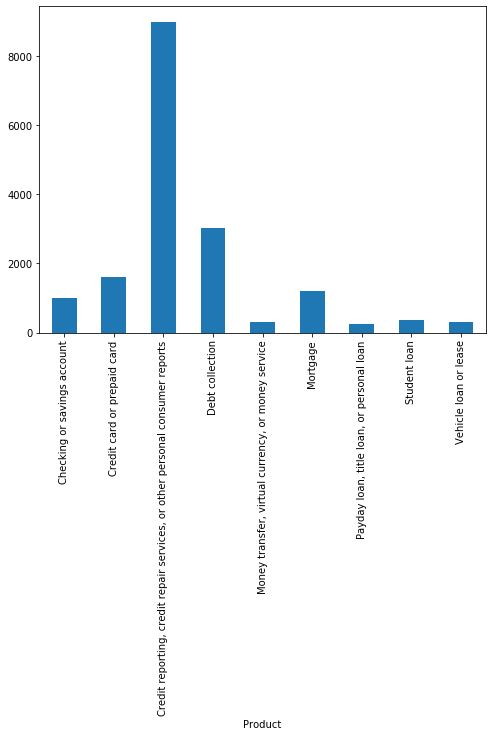

In [22]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('Product').Consumer_complaint_narrative.count().plot.bar(ylim=0)
plt.show()

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=0.001, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(df.Consumer_complaint_narrative).toarray()
labels = df.category_id
features.shape

(17047, 11246)

In [24]:
features[0]

array([0.09652499, 0.        , 0.        , ..., 0.        , 0.        ,
       0.        ])

In [25]:
from sklearn.feature_selection import chi2
import numpy as np

N = 2
for Product, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Product))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))

# 'Checking or savings account':
  . Most correlated unigrams:
       . branch
       . deposit
  . Most correlated bigrams:
       . savings account
       . checking account
# 'Credit card or prepaid card':
  . Most correlated unigrams:
       . citi
       . card
  . Most correlated bigrams:
       . american express
       . credit card
# 'Credit reporting, credit repair services, or other personal consumer reports':
  . Most correlated unigrams:
       . report
       . accounts
  . Most correlated bigrams:
       . xxxx xxxx
       . credit report
# 'Debt collection':
  . Most correlated unigrams:
       . collection
       . debt
  . Most correlated bigrams:
       . debt collection
       . collect debt
# 'Money transfer, virtual currency, or money service':
  . Most correlated unigrams:
       . tickets
       . paypal
  . Most correlated bigrams:
       . cash app
       . money transfer
# 'Mortgage':
  . Most correlated unigrams:
       . escrow
       . mortgage
  . Most co

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df['Consumer_complaint_narrative'], df['Product'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [27]:
print(clf.predict(count_vect.transform(["This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."])))

['Credit reporting, credit repair services, or other personal consumer reports']


In [28]:
print(clf.predict(count_vect.transform(["I am disputing the inaccurate information the Chex-Systems has on my credit report. I initially submitted a police report on XXXX/XXXX/16 and Chex Systems only deleted the items that I mentioned in the letter and not all the items that were actually listed on the police report. In other words they wanted me to say word for word to them what items were fraudulent. The total disregard of the police report and what accounts that it states that are fraudulent. If they just had paid a little closer attention to the police report I would not been in this position now and they would n't have to research once again. I would like the reported information to be removed : XXXX XXXX XXXX"])))

['Credit reporting, credit repair services, or other personal consumer reports']


In [29]:
df[df['Consumer_complaint_narrative'] == "This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."]

Empty DataFrame
Columns: [Product, Consumer_complaint_narrative, category_id]
Index: []

In [30]:
df[df['Consumer_complaint_narrative'] == "I am disputing the inaccurate information the Chex-Systems has on my credit report. I initially submitted a police report on XXXX/XXXX/16 and Chex Systems only deleted the items that I mentioned in the letter and not all the items that were actually listed on the police report. In other words they wanted me to say word for word to them what items were fraudulent. The total disregard of the police report and what accounts that it states that are fraudulent. If they just had paid a little closer attention to the police report I would not been in this position now and they would n't have to research once again. I would like the reported information to be removed : XXXX XXXX XXXX"]

Empty DataFrame
Columns: [Product, Consumer_complaint_narrative, category_id]
Index: []

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

C:\Users\v_durand\AppData\Local\Continuum\anaconda3\envs\mlchallenge\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\v_durand\AppData\Local\Continuum\anaconda3\envs\mlchallenge\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\v_durand\AppData\Local\Continuum\anaconda3\envs\mlchallenge\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\v_durand\AppData\Local\Continuum\anaconda3\envs\mlchallenge\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_cl

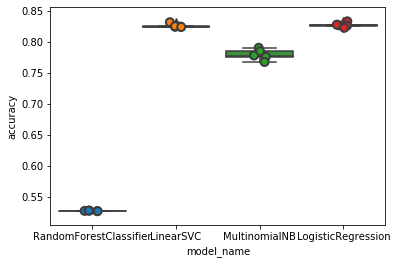

In [32]:
import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [33]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.826361
LogisticRegression        0.827652
MultinomialNB             0.779663
RandomForestClassifier    0.527307
Name: accuracy, dtype: float64

In [34]:
from sklearn.model_selection import train_test_split

model = LinearSVC()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

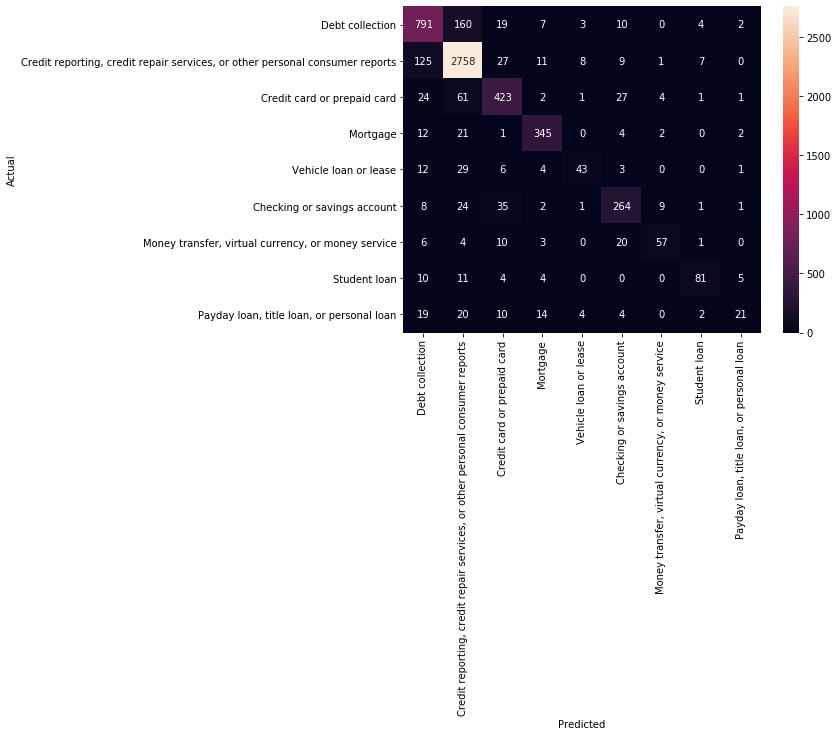

In [35]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Product.values, yticklabels=category_id_df.Product.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [36]:
from IPython.display import display

for predicted in category_id_df.category_id:
  for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 6:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['Product', 'Consumer_complaint_narrative']])
      print('')

'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Debt collection' : 125 examples.


Product  \
10356  Credit reporting, credit repair services, or o...   
2499   Credit reporting, credit repair services, or o...   
11924  Credit reporting, credit repair services, or o...   
53396  Credit reporting, credit repair services, or o...   
54235  Credit reporting, credit repair services, or o...   
...                                                  ...   
33603  Credit reporting, credit repair services, or o...   
57066  Credit reporting, credit repair services, or o...   
43568  Credit reporting, credit repair services, or o...   
40690  Credit reporting, credit repair services, or o...   
17180  Credit reporting, credit repair services, or o...   

                            Consumer_complaint_narrative  
10356  I would like to know what happens, that your l...  
2499   The following collection account is a fraudule...  
11924  XXXX XXXX XXXX acct number XXXX states that I ...  
53396  A collection was added to all three of my cred...  
54235  On XX/XX/XXXX two items showed up on my credit...  
...                                                  ...  
33603  I have recently received a copy of my credit r...  
57066  Im sending this email because Ive had multiple...  
43568  XXXX XXXX XXXX XXXX XXXX XXXX XXXX, OH XXXX Re...  
40690  XXXX XXXX # XXXX is reporting a debt I do not ...  
17180  I paid 4 Medical Collections on my credit on X...  

[125 rows x 2 columns]


'Credit card or prepaid card' predicted as 'Debt collection' : 24 examples.


Product  \
58182  Credit card or prepaid card   
34526  Credit card or prepaid card   
55562  Credit card or prepaid card   
42699  Credit card or prepaid card   
45470  Credit card or prepaid card   
57666  Credit card or prepaid card   
64798  Credit card or prepaid card   
34398  Credit card or prepaid card   
59438  Credit card or prepaid card   
47940  Credit card or prepaid card   
31149  Credit card or prepaid card   
50881  Credit card or prepaid card   
15549  Credit card or prepaid card   
6719   Credit card or prepaid card   
53947  Credit card or prepaid card   
64942  Credit card or prepaid card   
32550  Credit card or prepaid card   
59108  Credit card or prepaid card   
54908  Credit card or prepaid card   
45076  Credit card or prepaid card   
10474  Credit card or prepaid card   
50363  Credit card or prepaid card   
21564  Credit card or prepaid card   
19368  Credit card or prepaid card   

                            Consumer_complaint_narrative  
58182  Im writing to contest my wells fargo card serv...  
34526  I was charged {$4900.00} on XX/XX/XXXX by XXXX...  
55562  I attempted to make a payment on XXXX, to the ...  
42699  I have some different card, at the end all of ...  
45470  On my XXXX Credit report shows a charged off a...  
57666  I am having great difficulty attempting to neg...  
64798  I WAS IN XXXX FOR TWO YEARS IN VERY REMOTE ARE...  
34398  I was charged {$6500.00} on XX/XX/17 by XXXX, ...  
59438  To whom it may concern, I disputed this with a...  
47940  I had a credit card account with some company ...  
31149  Unfortunately, I had an account with Care Cred...  
50881  I AM INSTANTLY PUSHED OVER TO CORPORATE WHO I ...  
15549  On XX/XX/2019 my Citi Bank credit card was cha...  
6719   On XX/XX/2019 I submitted a puchase dispute to...  
53947  Comenity Bank has punished me and my family by...  
64942  CBNA failed to respond to 3 challenge letters ...  
32550  I have a 700+ credit score with 0 % debt ratio...  
59108  I just want them to stop calling me at work, i...  
54908  I started a phone repair claim back in XX/XX/2...  
45076  Capital One has responded I see, and with cons...  
10474  My account with Barclaycard was charged off in...  
50363  Hi and to whom it may concern : I'm not sure w...  
21564  I wrote Care Credit on XX/XX/XXXX regarding my...  
19368  Bank of America ( BA ) Credit Card approved ch...


'Mortgage' predicted as 'Debt collection' : 12 examples.


Product                       Consumer_complaint_narrative
50797  Mortgage  Loan originated with XXXX, transferred to XXXX...
50238  Mortgage  On XX/XX/2018 My husband was told that if I wa...
48357  Mortgage  Ditech Financial LLC has been mistakenly showi...
59294  Mortgage  XXXX XXXX called and left a voicemail from XXX...
60080  Mortgage  I had an equity loan with Citizens Bank. I pai...
49134  Mortgage  I have had a mortgage for a little over two ye...
13272  Mortgage  collection of legal expenses and other charges...
56524  Mortgage  Carrington Mortgage Services Approved a short ...
57700  Mortgage  ~I am a victim of identity theft. A forensic a...
53805  Mortgage  My property at XXXX XXXX in the city of XXXX, ...
52695  Mortgage  After requesting three times to have no more p...
55394  Mortgage  I called PHH immediately after receiving my ma...


'Vehicle loan or lease' predicted as 'Debt collection' : 12 examples.


Product  \
38036  Vehicle loan or lease   
63254  Vehicle loan or lease   
63119  Vehicle loan or lease   
51538  Vehicle loan or lease   
22549  Vehicle loan or lease   
45310  Vehicle loan or lease   
53144  Vehicle loan or lease   
48258  Vehicle loan or lease   
21636  Vehicle loan or lease   
27592  Vehicle loan or lease   
44677  Vehicle loan or lease   
46480  Vehicle loan or lease   

                            Consumer_complaint_narrative  
38036  Hi on XX/XX/2019, I purchased a used car throu...  
63254  In XXXX of XXXX Chrysler Capital had my car re...  
63119  I had a lease with Nissan-XXXX which had come ...  
51538  Refinanced with another bank. J P Morgan recei...  
22549  After falling behind in my payments, Regional ...  
45310  I called Thrift Investment Corp. on XX/XX/2019...  
53144  I have been trying to clear this collection up...  
48258  My husband soon to be ex husband ran out on my...  
21636  On XX/XX/19 I XXXX XXXX contacted XXXX XXXX to...  
27592  Account XXXX XXXX This loan was paid off late ...  
44677  I received a pay statement from ally bank, I w...  
46480  In XX/XX/XXXX i leased a 2016 XXXX XXXX for 3 ...


'Checking or savings account' predicted as 'Debt collection' : 8 examples.


Product  \
48244  Checking or savings account   
48466  Checking or savings account   
28038  Checking or savings account   
48534  Checking or savings account   
63344  Checking or savings account   
48393  Checking or savings account   
52158  Checking or savings account   
32362  Checking or savings account   

                            Consumer_complaint_narrative  
48244  XXXX XXXX XXXX XXXX XXXX contacted my mother a...  
48466  I've tried several attempts to resolve this ma...  
28038  We use Google Pay to collect rent payments fro...  
48534  I've tried several attempts to resolve this ma...  
63344  I signed a agreement to with draw funds from m...  
48393  've tried several attempts to resolve this mat...  
52158  I made a prior authorization with this company...  
32362  I receive calls every single day, some times m...


'Money transfer, virtual currency, or money service' predicted as 'Debt collection' : 6 examples.


Product  \
19078  Money transfer, virtual currency, or money ser...   
43695  Money transfer, virtual currency, or money ser...   
46587  Money transfer, virtual currency, or money ser...   
59389  Money transfer, virtual currency, or money ser...   
64307  Money transfer, virtual currency, or money ser...   
58210  Money transfer, virtual currency, or money ser...   

                            Consumer_complaint_narrative  
19078  I rented an apartment through XXXX that turned...  
43695  On XX/XX/2019 in XXXX XXXX money transfer tran...  
46587  I PAID IN 2016 OVER {$20000.00} TO 2 COMPANIES...  
59389  Ingo check cashing banned me for no valid reas...  
64307  I have transferred XXXX ripple from a crypto e...  
58210  The Jpay company is a service provided to sell...


'Student loan' predicted as 'Debt collection' : 10 examples.


Product                       Consumer_complaint_narrative
48437  Student loan  XX/XX/XXXX Federal tax offset amount {$1000.00...
40015  Student loan  I am getting calls a minimum of three times a ...
43336  Student loan  Respected Sir or Madam : I am following up wit...
63131  Student loan  I keep getting calls at work from a third part...
21860  Student loan  Im in collections i dont make enough to make p...
48184  Student loan  I started my payment at $ XXXX a month and the...
65380  Student loan  Last XX/XX/XXXX, Navient sent me 3 letter tell...
56628  Student loan  I ATTENDED XXXX XXXX COLLEGE IN XXXX XXXX ON X...
44070  Student loan  Beginning XX/XX/2019 my co-signer and I began ...
63988  Student loan  Near the end of 2017, my consumer credit monit...


'Payday loan, title loan, or personal loan' predicted as 'Debt collection' : 19 examples.


Product  \
46952  Payday loan, title loan, or personal loan   
45648  Payday loan, title loan, or personal loan   
56371  Payday loan, title loan, or personal loan   
16788  Payday loan, title loan, or personal loan   
21348  Payday loan, title loan, or personal loan   
10556  Payday loan, title loan, or personal loan   
45547  Payday loan, title loan, or personal loan   
57348  Payday loan, title loan, or personal loan   
54726  Payday loan, title loan, or personal loan   
43209  Payday loan, title loan, or personal loan   
37854  Payday loan, title loan, or personal loan   
54010  Payday loan, title loan, or personal loan   
41602  Payday loan, title loan, or personal loan   
51315  Payday loan, title loan, or personal loan   
65496  Payday loan, title loan, or personal loan   
61659  Payday loan, title loan, or personal loan   
14297  Payday loan, title loan, or personal loan   
31391  Payday loan, title loan, or personal loan   
58438  Payday loan, title loan, or personal loan   

                            Consumer_complaint_narrative  
46952  paid off in full they just keep switching lenders  
45648  I want to start by saying that I DID NOT open ...  
56371  Obtain the loan from Avant on XX/XX/XXXX for {...  
16788  XX/XX/19 around XXXX ( work hours ) XXXX XXXX ...  
21348  Set financial continues to call my husband aft...  
10556  Tower Loan is calling obsessively. They are ev...  
45547  I took out a loan with speedy cash in XX/XX/20...  
57348  I borrowed approximately XXXX dollars from thi...  
54726  I had went to a furniture store on XX/XX/XXXX ...  
43209  On XX/XX/XXXX Speedy Cash  debited my card for...  
37854  I got a installment loan with Heights Finance ...  
54010  This company has been deceptive from the begin...  
41602  The company sent a check in the mail to my hom...  
51315  I been getting around 8 calls per day to my ce...  
65496  I called CashNetUSA on XX/XX/2019 and another ...  
61659  On XXXX I borrowed XXXX. I was set up to pay t...  
14297  I initially took out a loan with XXXX XXXX ( Q...  
31391  XX/XX/, 2019 : I received {$400.00} payday loa...  
58438  I fell on hard times due to my mom being sick ...


'Debt collection' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 160 examples.


Product                       Consumer_complaint_narrative
50543  Debt collection  I contacted all 3 credit bureaus about the ina...
22328  Debt collection  In XX/XX/XXXX, I went to hospital emergency. A...
2845   Debt collection  XXXX XXXX XXXX incorrectly associated me with ...
63544  Debt collection  Recently signed up for monitoring company in w...
56774  Debt collection  I paid the following accounts in full. I am a ...
...                ...                                                ...
41724  Debt collection  XX/XX/XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX,...
49205  Debt collection  This account was paid by my insurance, they ke...
60803  Debt collection  The following accounts do not belong to me. I ...
57155  Debt collection  Tidewater Finance has continue to report this ...
47283  Debt collection  I have a credit card bill on my Equifax credit...

[160 rows x 2 columns]


'Credit card or prepaid card' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 61 examples.


Product  \
24582  Credit card or prepaid card   
44111  Credit card or prepaid card   
45186  Credit card or prepaid card   
18193  Credit card or prepaid card   
58343  Credit card or prepaid card   
...                            ...   
54880  Credit card or prepaid card   
47540  Credit card or prepaid card   
45022  Credit card or prepaid card   
63174  Credit card or prepaid card   
42367  Credit card or prepaid card   

                            Consumer_complaint_narrative  
24582  so 2 months ago today i called the creditor of...  
44111  Good Morning ; PLEASE HELP!!!! - I need some a...  
45186  Discover Company has been constantly sending m...  
18193  I submitted a complaint and the number is XXXX...  
58343  MACYS/DSNB REVOLVING ACCOUNT # XXXX OPEN DATE ...  
...                                                  ...  
54880  InXX/XX/2019, I received 2 notifications from ...  
47540  Dear Team, I have received lot of pre approved...  
45022  Capital one bank is reporting a past due charg...  
63174  Money was taken out of my account and i verifi...  
42367  On XX/XX/XXXX I have called the Comenity Bank ...  

[61 rows x 2 columns]


'Mortgage' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 21 examples.


Product                       Consumer_complaint_narrative
47500  Mortgage  As of today XX/XX/XXXX an according to XXXX XX...
36038  Mortgage  I have been trying to get the interest rate dr...
56982  Mortgage  A Bi-weekly payment process was authorized and...
35968  Mortgage  hiIhavecontactedloancarellcnumeroustimesinquir...
37254  Mortgage  Subject : shellpoint Loan : XXXX ( Rate Correc...
31115  Mortgage  I, Mr. XXXX XXXX, in XX/XX/XXXX was a victim o...
26797  Mortgage  Working with Bank of America on refinancing my...
40727  Mortgage  Ive ask Wells Fargo to take XXXX every two wee...
12112  Mortgage  Completed online mortgage application online v...
24225  Mortgage  THIS IS NOT A DUPLICATE. THIS IS NOT A DUPLICA...
48231  Mortgage  Failure to provide transparency for rate chang...
13388  Mortgage  Our loan thru XXXX XXXX XXXX originated in XX/...
7372   Mortgage  On XX/XX/2019, CREDIT TECH/XXXX XXXX address X...
47612  Mortgage  In 2013 we declared chapter XXXX bankruptcy Ba...
15831  Mortgage  I had my credit pulled by another mortgage com...
20620  Mortgage  PLEASE REFERENCE COMPLAINT ID : XXXX-XXXX Note...
16664  Mortgage  I send payment via online bill pay through my ...
42890  Mortgage  Compass Bank in XXXX XXXX, CA has reported to ...
24187  Mortgage  I have tried on a number of times to apply for...
22102  Mortgage  XXXX XXXX ( mortgage processor : NMLS XXXX wit...
46538  Mortgage  I filed chapter XXXX bankruptcy XX/XX/XXXX. Si...


'Vehicle loan or lease' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 29 examples.


Product  \
57320  Vehicle loan or lease   
61298  Vehicle loan or lease   
42372  Vehicle loan or lease   
59286  Vehicle loan or lease   
53265  Vehicle loan or lease   
59262  Vehicle loan or lease   
48989  Vehicle loan or lease   
42729  Vehicle loan or lease   
64000  Vehicle loan or lease   
16732  Vehicle loan or lease   
54593  Vehicle loan or lease   
56653  Vehicle loan or lease   
63200  Vehicle loan or lease   
49697  Vehicle loan or lease   
10348  Vehicle loan or lease   
44366  Vehicle loan or lease   
32455  Vehicle loan or lease   
41867  Vehicle loan or lease   
52378  Vehicle loan or lease   
52310  Vehicle loan or lease   
43383  Vehicle loan or lease   
32731  Vehicle loan or lease   
49979  Vehicle loan or lease   
53342  Vehicle loan or lease   
49599  Vehicle loan or lease   
55594  Vehicle loan or lease   
28074  Vehicle loan or lease   
10767  Vehicle loan or lease   
45288  Vehicle loan or lease   

                            Consumer_complaint_narrative  
57320  I submitted a complaint yesterday and have fou...  
61298  I bought a XXXX XXXX XXXX in XXXX of XXXX do a...  
42372  In XX/XX/2016 I leased a XXXX XXXX ( VIN XXXX ...  
59286  In XXXX of XXXX, I set up autopayments on the ...  
53265  I visited XXXX XXXX on XX/XX/XXXX to simply vi...  
59262  The early part of XXXX GM financial mailed out...  
48989  On or about XX/XX/2018, XXXX XXXX visited XXXX...  
42729  carmart in XXXX tn sold me a lemon that within...  
64000  I was looking through my report and noticed a ...  
16732  I visited XXXX XXXX in XXXX, NY to look at a n...  
54593  On my credit report for US Bank for a lease th...  
56653  I recently got a copy of my Credit Report and ...  
63200  My bank was drafted on XX/XX/2019 for XXXX. A ...  
49697  Please reference prior CFPB complaint XXXX. De...  
10348  Car was total loss in accident on XX/XX/XXXX. ...  
44366  In the process of pulling up my credit report ...  
32455  This company has denied me a loan when I have ...  
41867  I did not receive a refund on lease # XXXX, 20...  
52378  I co-sign for a friend and due to him being la...  
52310  I returned my car back to Nissan yet it seems ...  
43383  Late payments XXXX 2017-XXXX 2017. I was not l...  
32731  This company has denied me a loan when I have ...  
49979  After filing bankruptcy, the car loan company ...  
53342  On XX/XX/2014 I was added to a loan as a co-si...  
49599  On XX/XX/2019 I received an e-mail stating tha...  
55594  There was a hard pull on my credit and I did n...  
28074  I have a bout 2 late payments with XXXX XXXX o...  
10767  My vehicle was totaled onXX/XX/2019. My vehicl...  
45288  On XX/XX/2019, I wrote to XXXX, XXXX, and XXXX...


'Checking or savings account' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 24 examples.


Product  \
44699  Checking or savings account   
63101  Checking or savings account   
44703  Checking or savings account   
61440  Checking or savings account   
63005  Checking or savings account   
35443  Checking or savings account   
57884  Checking or savings account   
37986  Checking or savings account   
52848  Checking or savings account   
38316  Checking or savings account   
45907  Checking or savings account   
41802  Checking or savings account   
62824  Checking or savings account   
44620  Checking or savings account   
49539  Checking or savings account   
36008  Checking or savings account   
21910  Checking or savings account   
18772  Checking or savings account   
48779  Checking or savings account   
16872  Checking or savings account   
5715   Checking or savings account   
44723  Checking or savings account   
60323  Checking or savings account   
20575  Checking or savings account   

                            Consumer_complaint_narrative  
44699  For many years, I have a XXXX XXXX card which ...  
63101  I have disputed information in XX/XX/2019 with...  
44703  My account was closed due to suspected fraud. ...  
61440  I tried working with citibank regarding an err...  
63005  I WAS NOTIFIED BY A COUPLE OF CREDIT AGENCIES ...  
35443  XXXXXXXX XXXX XXXX will not provide me with an...  
57884  Back in XX/XX/2019 there was a unauthorized ch...  
37986  As of XX/XX/2019, I got an email notifying me ...  
52848  My complaint is based on using financial insti...  
38316  Bank of America has release my bank records go...  
45907  I have absolutely no idea what these accounts ...  
41802  XXXX XXXX credit card, XXXX XXXX XXXX ) XXXX X...  
62824  WE, XXXX AND XXXX XXXX WERE SCAMMED BY A COMPA...  
44620  A chargeback was filed on XX/XX/XXXX for a ite...  
49539  XX/XX/XXXX XXXX charged me {$700.00} for a ren...  
36008  WellsFargo did not look correctly into a claim...  
21910  I ended employment with XXXX early XXXX. I kee...  
18772  I filed a dispute with Wells Fargo on an unaut...  
48779  I have tried to open an account with several b...  
16872  XX/XX/2018 was the date of the rejected openin...  
5715   XXXX report shows no derogatory remarks yet I ...  
44723  I went to the Bank of America branch located a...  
60323  I have been charged twice now by automatic pay...  
20575  I went to a hair salon on XX/XX/19 had an appo...


'Student loan' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 11 examples.


Product                       Consumer_complaint_narrative
46913  Student loan  On XX/XX/2019 I asked my MyFedLoan servicer a ...
45637  Student loan  On XX/XX/XXXX, I filed a complaint with the CF...
64105  Student loan  I was arbitrarily expelled by XXXX XXXX XXXX w...
61342  Student loan  I have been in communication with XXXX XXXX, F...
43825  Student loan  I ordered my credit reports from all 3 bureaus...
46616  Student loan  This is a follow up from my last complaint tha...
48460  Student loan  I have 11 different student loan accounts pres...
44215  Student loan  I received an email on XX/XX/2019 from FedLoan...
53355  Student loan  I requested for an income-driven repayment pla...
64133  Student loan  I sent Discover Financial Services a letter in...
42359  Student loan  Im actually having a problem with the three ma...


'Payday loan, title loan, or personal loan' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 20 examples.


Product  \
63798  Payday loan, title loan, or personal loan   
15455  Payday loan, title loan, or personal loan   
57138  Payday loan, title loan, or personal loan   
49592  Payday loan, title loan, or personal loan   
49037  Payday loan, title loan, or personal loan   
56218  Payday loan, title loan, or personal loan   
38711  Payday loan, title loan, or personal loan   
43363  Payday loan, title loan, or personal loan   
50988  Payday loan, title loan, or personal loan   
52356  Payday loan, title loan, or personal loan   
43435  Payday loan, title loan, or personal loan   
52952  Payday loan, title loan, or personal loan   
56722  Payday loan, title loan, or personal loan   
59074  Payday loan, title loan, or personal loan   
60179  Payday loan, title loan, or personal loan   
64803  Payday loan, title loan, or personal loan   
35950  Payday loan, title loan, or personal loan   
49125  Payday loan, title loan, or personal loan   
57382  Payday loan, title loan, or personal loan   
38657  Payday loan, title loan, or personal loan   

                            Consumer_complaint_narrative  
63798  On XX/XX/XXXX I entered into a financing contr...  
15455  XX/XX/2019 XXXX was posted to my bank account....  
57138  I XXXX XXXX do not nor do I recognize an accou...  
49592  I have received this year two letters of credi...  
49037  XXXX my main issue is insurances placed on loa...  
56218  On XX/XX/2019 I decided to apply for a persona...  
38711  I had never heard of Mariner Finance before to...  
43363  They've called me 3 times today & I'm currentl...  
50988  I checked my credit report on my paid prescrip...  
52356  I made a regularly scheduled payment to SoFi o...  
43435  Money Lion claims to be a financial services c...  
52952  I called Prosper to understand the interested ...  
56722    Incorrect information reported. Not my account.  
59074  tried to get a personal loan when I mentioned ...  
60179  I attempted to complete my standard {$97.00} m...  
64803  On XX/XX/XXXX this year I got a credit report ...  
35950  Request of terms, rules, agreements with vario...  
49125  During the beginning of XXXX, I applied for a ...  
57382  I filed a complaint through the CFPB and the c...  
38657  The self lender account that was open on XXXX ...


'Debt collection' predicted as 'Credit card or prepaid card' : 19 examples.


Product                       Consumer_complaint_narrative
44432  Debt collection  After opening a Kohls charge card I made my fi...
1671   Debt collection  I BOUGHT TWO XXXX XXXX CARDS FOR XXXX I NEVER ...
44567  Debt collection  I received a move out bill dated XX/XX/2018 fr...
45779  Debt collection  Synchrony Bank continues to charge interest to...
55584  Debt collection  None of those options correctly defined my com...
44375  Debt collection  I received a letter dated XX/XX/2019 informing...
47414  Debt collection  I am writing to dispute an account fraudulentl...
56678  Debt collection  I have tried to contact this credit card compa...
15373  Debt collection  Charged for fraudulent charges on XXXX account...
48670  Debt collection  XXXX XXXX it was capital one USA bank this was...
52512  Debt collection  Bank of America ( MBNA ) was the 3rd party tha...
26020  Debt collection  this issue was identity theft resolved with ci...
27580  Debt collection  I had XXXX XXXX for approximately 4 years. In ...
28022  Debt collection  I closed my Citi Thank You Preferred card on X...
43282  Debt collection  We have been a member of the Discover credit c...
56366  Debt collection  XX/XX/2019 I received notice of bill for {$27....
49365  Debt collection  I purchased a mattress from Sears in XX/XX/XXX...
47504  Debt collection  I am writing to dispute an account fraudulentl...
32524  Debt collection  I had a report of a Wells Fargo Credit Card re...


'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Credit card or prepaid card' : 27 examples.


Product  \
57452  Credit reporting, credit repair services, or o...   
25896  Credit reporting, credit repair services, or o...   
15417  Credit reporting, credit repair services, or o...   
54603  Credit reporting, credit repair services, or o...   
4575   Credit reporting, credit repair services, or o...   
63185  Credit reporting, credit repair services, or o...   
18265  Credit reporting, credit repair services, or o...   
54926  Credit reporting, credit repair services, or o...   
54956  Credit reporting, credit repair services, or o...   
55716  Credit reporting, credit repair services, or o...   
47078  Credit reporting, credit repair services, or o...   
45584  Credit reporting, credit repair services, or o...   
26813  Credit reporting, credit repair services, or o...   
24433  Credit reporting, credit repair services, or o...   
30449  Credit reporting, credit repair services, or o...   
43862  Credit reporting, credit repair services, or o...   
44355  Credit reporting, credit repair services, or o...   
47167  Credit reporting, credit repair services, or o...   
24397  Credit reporting, credit repair services, or o...   
24900  Credit reporting, credit repair services, or o...   
3713   Credit reporting, credit repair services, or o...   
25996  Credit reporting, credit repair services, or o...   
34358  Credit reporting, credit repair services, or o...   
10496  Credit reporting, credit repair services, or o...   
64858  Credit reporting, credit repair services, or o...   
26360  Credit reporting, credit repair services, or o...   
35145  Credit reporting, credit repair services, or o...   

                            Consumer_complaint_narrative  
57452  I applied for a CitiBank Credit card. CitiBank...  
25896  On XX/XX/XXXX, my wife and I initiated a credi...  
15417     Im not familiar with this credit card provider  
54603  I had my American Express credit card stolen a...  
4575   XXXX of 2018 I was in XXXX XXXX went to a time...  
63185  Hello, In XX/XX/2018 I received a call from Ch...  
18265  In XXXX, Universal Citi Card sent me a letter ...  
54926  Target Red card has made several mistakes and ...  
54956  I had a Kohls credit card through Capital One....  
55716  I have one late payment reported o credit repo...  
47078  I have a credit monitoring service through Exp...  
45584  Capital One informed me with false information...  
26813  On XX/XX/2019, Sychrony Bank - TJ Max rewards ...  
24433  There is a missed/ late payment on my account ...  
30449  I opened a credit card account with GE Financi...  
43862  Below is the email I sent to resolve a situati...  
44355  Macy's/Bloomingdales Had fraud happen on XX/XX...  
47167  I opened a credit card with US Bank/ XXXX Mast...  
24397  Citicards has committed a fraudulent purchased...  
24900  on XX/XX/2019 went bank of America XXXX PA mee...  
3713   I received two letters stating that my minimum...  
25996  On XX/XX/XXXX, my wife and I initiated a credi...  
34358  There were a number of issues with this credit...  
10496  To whom it ay concerm this account has never b...  
64858  In XXXX of 2017 I got sick. I totally spaced o...  
26360  This issue concerns a XXXX XXXX credit card th...  
35145  On XX/XX/XXXXI had a hard report on my account...


'Vehicle loan or lease' predicted as 'Credit card or prepaid card' : 6 examples.


Product  \
65590  Vehicle loan or lease   
46977  Vehicle loan or lease   
51460  Vehicle loan or lease   
61230  Vehicle loan or lease   
42577  Vehicle loan or lease   
57587  Vehicle loan or lease   

                            Consumer_complaint_narrative  
65590  THE COMPANY IS CHARGING MORE AND MORE ON INTER...  
46977  On XX/XX/2019 I received a copy of the Vehicle...  
51460  I had auto pay scheduled to reoccur each month...  
61230  I called bridgecrest costumer service represen...  
42577  XXXX  XXXX XXXX  forced us to make a non-refun...  
57587  Exeter finance charge off account I have been ...


'Checking or savings account' predicted as 'Credit card or prepaid card' : 35 examples.


Product  \
47269  Checking or savings account   
52600  Checking or savings account   
10430  Checking or savings account   
26743  Checking or savings account   
57432  Checking or savings account   
27622  Checking or savings account   
64112  Checking or savings account   
45010  Checking or savings account   
61470  Checking or savings account   
46031  Checking or savings account   
20094  Checking or savings account   
55046  Checking or savings account   
61584  Checking or savings account   
5381   Checking or savings account   
25835  Checking or savings account   
18848  Checking or savings account   
21000  Checking or savings account   
48398  Checking or savings account   
63223  Checking or savings account   
50445  Checking or savings account   
46949  Checking or savings account   
30349  Checking or savings account   
20738  Checking or savings account   
55184  Checking or savings account   
64779  Checking or savings account   
29274  Checking or savings account   
44737  Checking or savings account   
42415  Checking or savings account   
53202  Checking or savings account   
27784  Checking or savings account   
36662  Checking or savings account   
23870  Checking or savings account   
44253  Checking or savings account   
57770  Checking or savings account   
57264  Checking or savings account   

                            Consumer_complaint_narrative  
47269  Hi, I got charged by my bank ( PNC ) for a cas...  
52600  On XX/XX/2019 I went to a drive thru atm machi...  
10430  Opened Citibank priority account on XX/XX/19 w...  
26743  On XX/XX/XXXX, I signed up for a Citibank Prio...  
57432  On XX/XX/2019 I initiated balancing my checkin...  
27622  my checking account was charged a {$34.00} fee...  
64112  On XX/XX/19 I purchased a gift card in the amo...  
45010  XXXX XXXX XXXX XXXX is a high end alcohol and ...  
61470  On XX/XX/19 I discovered that my Chase Busines...  
46031  Greetings, I called Wells Fargo this morning a...  
20094  On XX/XX/XXXX I spent XXXX $ at XXXX XXXX XXXX...  
55046  On XX/XX/2019 I sent a wire transfer from my C...  
61584  I sent 2 transfer forms along with a letter of...  
5381   On XX/XX/XXXX, my debit card was declined for ...  
25835  On XX/XX/XXXX, at XXXX XXXX I called Citibank ...  
18848  Bank of America wants to charge my account for...  
21000  BoA refuses to acknowledge that they are discr...  
48398  XXXX XXXX XXXX, Vice President, Head of Custom...  
63223  I filed a claim onXX/XX/XXXX and was told that...  
50445  On XX/XX/2019 at XXXX XXXX I paid my monthly p...  
46949  I made a purchase with XXXX XXXX XXXX on XX/XX...  
30349  On XX/XX/2019 I came to the branch of Citibank...  
20738  On XX/XX/2018, I submitted a response to the X...  
55184  On XX/XX/2019 I awoke to several alerts on my ...  
64779  I called pen fed credit union to let them know...  
29274  Company put a hold on my sons account..called ...  
44737  I have been running into issues with Bank of A...  
42415  On XX/XX/XXXX, I received a voicemail from Dis...  
53202  On XX/XX/2019, I was in the XXXX Airport. That...  
27784  I submitted a claim to XXXX XXXX due to a prob...  
36662  I immediately filed a fraud claim with Bank of...  
23870  I submitted a dispute with Netspend and they o...  
44253  Im totally frustrated with my service with TD....  
57770  Since XX/XX/XXXX American Express Bluebird Deb...  
57264  This has been going on for multiple weeks now....


'Money transfer, virtual currency, or money service' predicted as 'Credit card or prepaid card' : 10 examples.


Product  \
48275  Money transfer, virtual currency, or money ser...   
57502  Money transfer, virtual currency, or money ser...   
8815   Money transfer, virtual currency, or money ser...   
4721   Money transfer, virtual currency, or money ser...   
39411  Money transfer, virtual currency, or money ser...   
56691  Money transfer, virtual currency, or money ser...   
56459  Money transfer, virtual currency, or money ser...   
11970  Money transfer, virtual currency, or money ser...   
65542  Money transfer, virtual currency, or money ser...   
54853  Money transfer, virtual currency, or money ser...   

                            Consumer_complaint_narrative  
48275  On XX/XX/2019 a client reserved XXXX XXXX at m...  
57502  I made a transaction yesterday, an amount of $...  
8815   Greetings, I signed up with PayPal credit to r...  
4721   I have a pay pal account under the name XXXX X...  
39411  Google ( 1 ) suspended my payments account wit...  
56691  I was contacted by someone whom at the time pr...  
56459  I have an issue with the 180 Day Hold on PayPa...  
11970  I had a credit card with Barclay. Barclay sold...  
65542  On XX/XX/XXXX I had my chase account hacked an...  
54853  I sent {$100.00} thru WesternUnion to be pick ...


'Payday loan, title loan, or personal loan' predicted as 'Credit card or prepaid card' : 10 examples.


Product  \
52146  Payday loan, title loan, or personal loan   
51034  Payday loan, title loan, or personal loan   
60253  Payday loan, title loan, or personal loan   
52672  Payday loan, title loan, or personal loan   
55560  Payday loan, title loan, or personal loan   
49151  Payday loan, title loan, or personal loan   
43785  Payday loan, title loan, or personal loan   
30195  Payday loan, title loan, or personal loan   
3827   Payday loan, title loan, or personal loan   
59267  Payday loan, title loan, or personal loan   

                            Consumer_complaint_narrative  
52146  XX/XX/XXXX made a {$140.00} purchase through X...  
51034  XX/XX/19 a personal loan, account # XXXX from ...  
60253  When I signed up for this financial product, I...  
52672  They have charged me a 639.87 % interest rate ...  
55560  I took out a personal loan on XX/XX/2018. Sinc...  
49151  So I had applied for a line of credit through ...  
43785  I recently got hit with a 30 day late payment ...  
30195  Paypal credit offers a deferred interest optio...  
3827   I ended services with PayPal several years ago...  
59267  MADE A PURCHASE OF JEWELRY IN XXXX ALASKA IN X...


'Debt collection' predicted as 'Mortgage' : 7 examples.


Product                       Consumer_complaint_narrative
60028  Debt collection  From the Desk of XXXX XXXX XXXX XXXXXXXX XXXX ...
32852  Debt collection  To Servicing Bank : SELECT PORFOLIO SERVICING ...
35918  Debt collection  OFFICE OF XXXX XXXX XXXX XXXX  XXXX XXXX, XXXX...
50205  Debt collection  Subject : Complaint To : Consumer Complaint Ag...
49925  Debt collection  Please know I take my home responsibility very...
44658  Debt collection  I have been paying the debt collector Real Tim...
25872  Debt collection  I called IQ Data International Collection comp...


'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Mortgage' : 11 examples.


Product  \
54557  Credit reporting, credit repair services, or o...   
57552  Credit reporting, credit repair services, or o...   
48391  Credit reporting, credit repair services, or o...   
53635  Credit reporting, credit repair services, or o...   
20730  Credit reporting, credit repair services, or o...   
37300  Credit reporting, credit repair services, or o...   
45707  Credit reporting, credit repair services, or o...   
37278  Credit reporting, credit repair services, or o...   
41658  Credit reporting, credit repair services, or o...   
47051  Credit reporting, credit repair services, or o...   
53857  Credit reporting, credit repair services, or o...   

                            Consumer_complaint_narrative  
54557  XXXX XXXX and XXXX XXXX appears on my credit r...  
57552  Mr. Cooper mortgage has failed to report my lo...  
48391  I have disputed information repeatedly regardi...  
53635  I use to lease a XXXX XXXX XXXX hybrid til XX/...  
20730  The company is Roundpoint Mortgage.\r\n\r\nIn ...  
37300  My ex wife refinanced what was our joint mortg...  
45707  I have a mortgage through Wells Fargo. I purch...  
37278  My ex wife refinanced what was our joint mortg...  
41658  American Financial Network keeps sending plast...  
47051  I recently arrived at a settlement with TD Ban...  
53857  I attached a copy of the letter for the compla...


'Payday loan, title loan, or personal loan' predicted as 'Mortgage' : 14 examples.


Product  \
60110  Payday loan, title loan, or personal loan   
55933  Payday loan, title loan, or personal loan   
54902  Payday loan, title loan, or personal loan   
40770  Payday loan, title loan, or personal loan   
54868  Payday loan, title loan, or personal loan   
21974  Payday loan, title loan, or personal loan   
36036  Payday loan, title loan, or personal loan   
63476  Payday loan, title loan, or personal loan   
53134  Payday loan, title loan, or personal loan   
11001  Payday loan, title loan, or personal loan   
28220  Payday loan, title loan, or personal loan   
46667  Payday loan, title loan, or personal loan   
49224  Payday loan, title loan, or personal loan   
31069  Payday loan, title loan, or personal loan   

                            Consumer_complaint_narrative  
60110  onemain financial scammed me when I refinanced...  
55933  Loan was started on XX/XX/2019. For the amount...  
54902  LendingClub is an online consumer loan company...  
40770  This company sent me a live check for a loan w...  
54868  I got a flex loan from advanced financial. At ...  
21974  I contacted the Branch Manager in XXXX XXXX, L...  
36036  twice in less than a year my account was locke...  
63476  Every month when I called LendingClub to make ...  
53134  I called lending club back in XX/XX/XXXX. XX/X...  
11001  XXXX and I were told by U.S. Bank rep XXXX XXX...  
28220  I have several complaints The first is the I w...  
46667  Loan was paid off on XX/XX/2019. PNC said they...  
49224  -Installment Loan Account # XXXX - Effective d...  
31069  I obtained a XXXX XXXX from XXXX XXXX Bank for...


'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Vehicle loan or lease' : 8 examples.


Product  \
57466  Credit reporting, credit repair services, or o...   
59126  Credit reporting, credit repair services, or o...   
64568  Credit reporting, credit repair services, or o...   
63189  Credit reporting, credit repair services, or o...   
57290  Credit reporting, credit repair services, or o...   
16303  Credit reporting, credit repair services, or o...   
65644  Credit reporting, credit repair services, or o...   
54541  Credit reporting, credit repair services, or o...   

                            Consumer_complaint_narrative  
57466  Please see CFPB Compliant ID XXXX and my respo...  
59126  I had an auto loan with this company. On XX/XX...  
64568                                    Unknown account  
63189  I live in XXXX But i moved to XXXX in XXXX. In...  
57290  To Whom it may concern : I had leased a vehicl...  
16303  This is in regards to my XXXX XXXX XXXX XXXX l...  
65644  My Auto loan is due on the XX/XX/XXXX of each ...  
54541  Hello, We have had an ongoing issue with Ameri...


'Debt collection' predicted as 'Checking or savings account' : 10 examples.


Product                       Consumer_complaint_narrative
42228  Debt collection  This is was charged off and should not be on m...
45917  Debt collection  Certegy is a company that authorizes transacti...
3311   Debt collection  XXXX XXXX XXXX improperly froze my bank accoun...
56029  Debt collection  I have had a Wells Fargo checking account sinc...
36884  Debt collection  I was under the understanding that medical bil...
32179  Debt collection  Company requesting money for an account I neve...
24682  Debt collection  When I was doing my routine bank reconciliatio...
34496  Debt collection  This happen in XXXX, 2018 not sure what day bu...
43077  Debt collection  I have been separated for over a year and my d...
39795  Debt collection  The account is fraudulent. I never opened this...


'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Checking or savings account' : 9 examples.


Product  \
57508  Credit reporting, credit repair services, or o...   
28796  Credit reporting, credit repair services, or o...   
21802  Credit reporting, credit repair services, or o...   
3094   Credit reporting, credit repair services, or o...   
5359   Credit reporting, credit repair services, or o...   
26463  Credit reporting, credit repair services, or o...   
27578  Credit reporting, credit repair services, or o...   
59152  Credit reporting, credit repair services, or o...   
55282  Credit reporting, credit repair services, or o...   

                            Consumer_complaint_narrative  
57508  This issue is with global Payments - they are ...  
28796  I applied for a auto loan from my bank via pho...  
21802  I have had two HELOC loans with US Bank for a ...  
3094   During the week of XX/XX/2019 I wrote a busine...  
5359   I have contacted ChexSystems after being denie...  
26463  TO : Consumer Financial Protection Bureau RE :...  
27578  ThisisforExperiancreditbureau.XXXXXXXXXXXXgott...  
59152  A yearly event when I apply for Hardship Assis...  
55282  California Bank & Trust, I dispute amount in X...


'Credit card or prepaid card' predicted as 'Checking or savings account' : 27 examples.


Product  \
53309  Credit card or prepaid card   
60357  Credit card or prepaid card   
56785  Credit card or prepaid card   
60395  Credit card or prepaid card   
49417  Credit card or prepaid card   
27662  Credit card or prepaid card   
61115  Credit card or prepaid card   
25774  Credit card or prepaid card   
18784  Credit card or prepaid card   
63153  Credit card or prepaid card   
48375  Credit card or prepaid card   
17961  Credit card or prepaid card   
37442  Credit card or prepaid card   
36086  Credit card or prepaid card   
63276  Credit card or prepaid card   
52562  Credit card or prepaid card   
49321  Credit card or prepaid card   
32132  Credit card or prepaid card   
37452  Credit card or prepaid card   
65548  Credit card or prepaid card   
28094  Credit card or prepaid card   
63127  Credit card or prepaid card   
30573  Credit card or prepaid card   
56365  Credit card or prepaid card   
46985  Credit card or prepaid card   
56760  Credit card or prepaid card   
61229  Credit card or prepaid card   

                            Consumer_complaint_narrative  
53309  On XX/XX/XXXX I loaded {$300.00}. When I went ...  
60357  On Saturday XX/XX/XXXX around XXXX I walked in...  
56785  Call many times Visit bank locations Speak wit...  
60395  On XX/XX/XXXX my card and money was comprised....  
49417  I have a credit card with Bank of America. My ...  
27662  I tried to get to the bottom a Foreign Transac...  
61115  I received 0 % cash advance offer on XX/XX/201...  
25774  I was a victim of ID fraud and theft and someo...  
18784  THD/CBNA refused to acknowledge my previous re...  
63153  On XX/XX/2019 there were a total of 6 transact...  
48375  Re : Unauthorized Debit Dear Sir/Madam : Pleas...  
17961  i disputed at the end of XXXX XXXX from sonic....  
37442  Ever since Netspend changed their overdraft pr...  
36086  Wells Fargo closed my credit card account a mo...  
63276  On XX/XX/XXXX I was charged XXXX $ to repair m...  
52562  I made a purchase online for {$710.00} on XX/X...  
49321  Wells Fargo through its GoFarRewards Program o...  
32132  PROBLEM IS WITH B.O.A. ( bank of America ) 1 X...  
37452  I called Netspend on XX/XX/2019 because I rece...  
65548  NFCU has NOT responded to complaint submitted ...  
28094  I am trying to close my Wells Fargo account. I...  
63127  I do not wish to report bank of am badly but t...  
30573  The complainant was shocked to hear that Wells...  
56365  My wallet was stolen in XX/XX/2018. A while af...  
46985  Discover closed my account and took my {$1500....  
56760  I received an email on XX/XX/2019 from XXXX ( ...  
61229  Mr. & Mrs. XXXX XXXX XXXX XXXX XXXX XXXX XXXX ...


'Money transfer, virtual currency, or money service' predicted as 'Checking or savings account' : 20 examples.


Product  \
55027  Money transfer, virtual currency, or money ser...   
35403  Money transfer, virtual currency, or money ser...   
21376  Money transfer, virtual currency, or money ser...   
43128  Money transfer, virtual currency, or money ser...   
14736  Money transfer, virtual currency, or money ser...   
65660  Money transfer, virtual currency, or money ser...   
63035  Money transfer, virtual currency, or money ser...   
61619  Money transfer, virtual currency, or money ser...   
49719  Money transfer, virtual currency, or money ser...   
43310  Money transfer, virtual currency, or money ser...   
42233  Money transfer, virtual currency, or money ser...   
55006  Money transfer, virtual currency, or money ser...   
44350  Money transfer, virtual currency, or money ser...   
64081  Money transfer, virtual currency, or money ser...   
49839  Money transfer, virtual currency, or money ser...   
60421  Money transfer, virtual currency, or money ser...   
53839  Money transfer, virtual currency, or money ser...   
64849  Money transfer, virtual currency, or money ser...   
26317  Money transfer, virtual currency, or money ser...   
59956  Money transfer, virtual currency, or money ser...   

                            Consumer_complaint_narrative  
55027  On XXXX XX/XX/2019 a mobile deposit was made t...  
35403  On XX/XX/XXXX, I sent {$240.00} to a XXXX XXXX...  
21376  On XX/XX/19 I received a call from samone who ...  
43128  On XX/XX/2019 I entered chase bank located XXX...  
14736  I Purchased a set wave ( Antenna ) from XXXX d...  
65660  I am a PNC bank cust. Another PNC bank custome...  
63035  Whom this may concern, On Monday XX/XX/XXXX, I...  
61619  On XX/XX/2019 I initiated a transfer of XXXX L...  
49719  Total scam and fraud. Do not link your bank ac...  
43310  On XX/XX/2019 my daughter endorsed her paychec...  
42233  On XX/XX/2013 I obtained a cashiers check usin...  
55006  On or about XX/XX/2019 a check from XXXX XXXX,...  
44350  I deposited {$100.00} to my Skrill account and...  
64081  I am an attorney in New York. On XX/XX/2019 my...  
49839  hi this is the unsolved follow up claim relate...  
60421  In XX/XX/2019 I deposited 2 checks and {$60.00...  
53839  XX/XX/2019 I sold my primary residence in XXXX...  
64849  I opened an account with Coinbase to buy crypt...  
26317  On XX/XX/2019 I made a payment in the amount o...  
59956  On XX/XX/XXXX, a check was requested for the b...


'Checking or savings account' predicted as 'Money transfer, virtual currency, or money service' : 9 examples.


Product  \
17082  Checking or savings account   
51742  Checking or savings account   
60694  Checking or savings account   
29863  Checking or savings account   
16722  Checking or savings account   
36046  Checking or savings account   
51944  Checking or savings account   
31699  Checking or savings account   
56051  Checking or savings account   

                            Consumer_complaint_narrative  
17082  On XX/XX/2018 there were multiple transaction ...  
51742  This is a continuation of complaint # XXXX. \r...  
60694  I was contacted via phone and XXXX on XXXX abo...  
29863  Bank of America N.A. continues to abuse regist...  
16722  I had a transfer to my Wells fargo from XXXX f...  
36046  I used Popular Bank XXXX XXXX which is an app ...  
51944  Paypal put the limitation on my account since ...  
31699  I have a checking account with BanK of America...  
56051  We were looking for ticket for an upcoming con...


'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Student loan' : 7 examples.


Product  \
53965  Credit reporting, credit repair services, or o...   
64662  Credit reporting, credit repair services, or o...   
14732  Credit reporting, credit repair services, or o...   
32846  Credit reporting, credit repair services, or o...   
43717  Credit reporting, credit repair services, or o...   
61061  Credit reporting, credit repair services, or o...   
57324  Credit reporting, credit repair services, or o...   

                            Consumer_complaint_narrative  
53965  While investigating if I was eligible for a lo...  
64662  Bottom Line Up Front : Fedloan erroneously rep...  
14732  I went to XXXX XXXX XXXX in XXXX California fr...  
32846  I recently found out that a Citibank student l...  
43717  I have now tried on multiple occasions to reac...  
61061  The year XX/XX/XXXX-XX/XX/XXXX Dept of Educati...  
57324  Sallie Mae/Navient listed me as a Co-Signer of...

In [37]:
model.fit(features, labels)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [38]:
from sklearn.feature_selection import chi2

N = 2
for Product, category_id in sorted(category_to_id.items()):
  indices = np.argsort(model.coef_[category_id])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("# '{}':".format(Product))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# 'Checking or savings account':
  . Top unigrams:
       . bank
       . checking
  . Top bigrams:
       . savings account
       . open bank
# 'Credit card or prepaid card':
  . Top unigrams:
       . card
       . minimum
  . Top bigrams:
       . balance transfer
       . late fee
# 'Credit reporting, credit repair services, or other personal consumer reports':
  . Top unigrams:
       . experian
       . transunion
  . Top bigrams:
       . xxxx reporting
       . numerous letters
# 'Debt collection':
  . Top unigrams:
       . debt
       . collect
  . Top bigrams:
       . single mother
       . accounts belong
# 'Money transfer, virtual currency, or money service':
  . Top unigrams:
       . paypal
       . transfer
  . Top bigrams:
       . money transfer
       . fargo account
# 'Mortgage':
  . Top unigrams:
       . mortgage
       . escrow
  . Top bigrams:
       . mortgage payment
       . loan care
# 'Payday loan, title loan, or personal loan':
  . Top unigrams:
       .

In [39]:
texts = ["I requested a home loan modification through Bank of America. Bank of America never got back to me.",
         "It has been difficult for me to find my past due balance. I missed a regular monthly payment",
         "I can't get the money out of the country.",
         "I have no money to pay my tuition",
         "Coinbase closed my account for no reason and furthermore refused to give me a reason despite dozens of request"]
text_features = tfidf.transform(texts)
predictions = model.predict(text_features)
for text, predicted in zip(texts, predictions):
  print('"{}"'.format(text))
  print("  - Predicted as: '{}'".format(id_to_category[predicted]))
  print("")

"I requested a home loan modification through Bank of America. Bank of America never got back to me."
  - Predicted as: 'Mortgage'

"It has been difficult for me to find my past due balance. I missed a regular monthly payment"
  - Predicted as: 'Credit reporting, credit repair services, or other personal consumer reports'

"I can't get the money out of the country."
  - Predicted as: 'Checking or savings account'

"I have no money to pay my tuition"
  - Predicted as: 'Checking or savings account'

"Coinbase closed my account for no reason and furthermore refused to give me a reason despite dozens of request"
  - Predicted as: 'Checking or savings account'



In [40]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, 
                                    target_names=df['Product'].unique()))

                                                                              precision    recall  f1-score   support

                                                             Debt collection       0.79      0.79      0.79       996
Credit reporting, credit repair services, or other personal consumer reports       0.89      0.94      0.91      2946
                                                 Credit card or prepaid card       0.79      0.78      0.78       544
                                                                    Mortgage       0.88      0.89      0.89       387
                                                       Vehicle loan or lease       0.72      0.44      0.54        98
                                                 Checking or savings account       0.77      0.77      0.77       345
                          Money transfer, virtual currency, or money service       0.78      0.56      0.66       101
                                                       